In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [5]:
dataset = pd.read_csv(r"C:\Users\Mayur23\OneDrive\Desktop\Prodigy Infotech\DS_Task_05\Road.csv")

print(dataset.head())

print(dataset.isnull().sum())

print(dataset.info())


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [6]:
numerical_columns = dataset.select_dtypes(include=np.number).columns
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())

categorical_columns = dataset.select_dtypes(include='object').columns
for col in categorical_columns:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

dataset = dataset.drop_duplicates()


In [7]:
dataset['Weather_conditions'] = dataset['Weather_conditions'].str.lower().str.strip()

In [8]:
def categorize_time(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

dataset['Time_category'] = dataset['Time'].apply(categorize_time)


In [9]:
weather_agg = dataset.groupby('Weather_conditions')['Accident_severity'].value_counts().unstack()
print(weather_agg)

Accident_severity   Fatal injury  Serious Injury  Slight Injury
Weather_conditions                                             
cloudy                       NaN             8.0          117.0
fog or mist                  NaN             1.0            9.0
normal                     135.0          1474.0         8454.0
other                        NaN            28.0          268.0
raining                     23.0           158.0         1150.0
raining and windy            NaN             2.0           38.0
snow                         NaN             5.0           56.0
unknown                      NaN            51.0          241.0
windy                        NaN            16.0           82.0


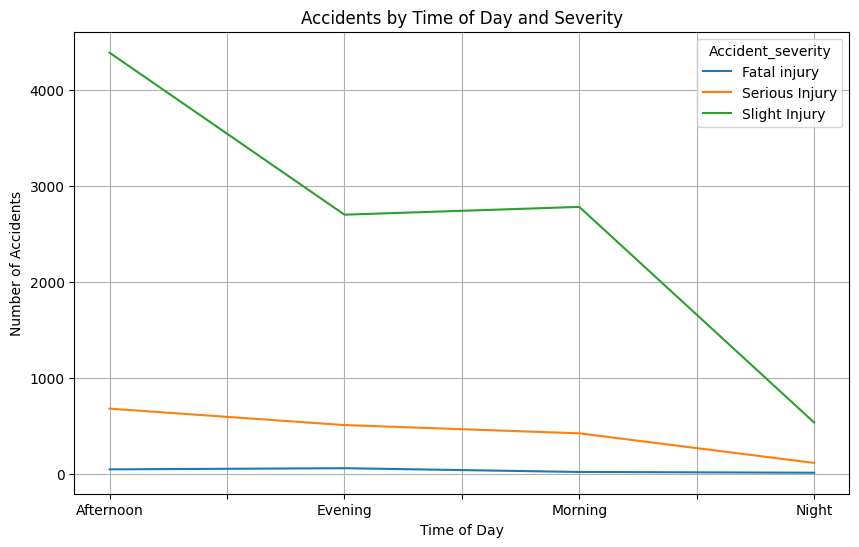

In [10]:
time_accidents = dataset.groupby('Time_category')['Accident_severity'].value_counts().unstack()

time_accidents.plot(kind='line', figsize=(10, 6))
plt.title('Accidents by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

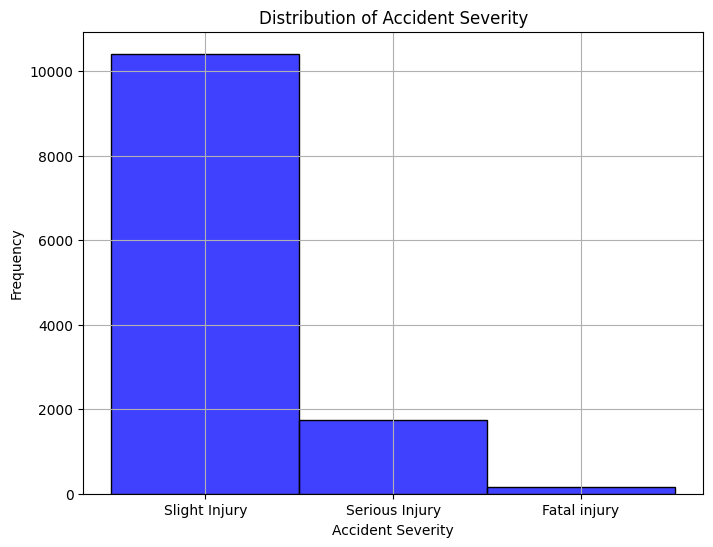

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Accident_severity'], kde=False, bins=10, color='blue')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

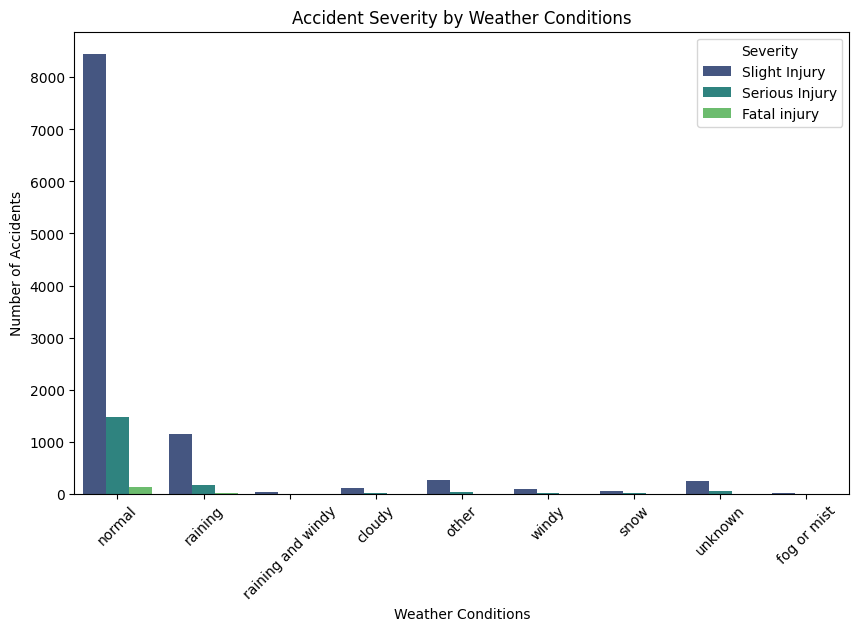

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Weather_conditions', hue='Accident_severity', palette='viridis')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

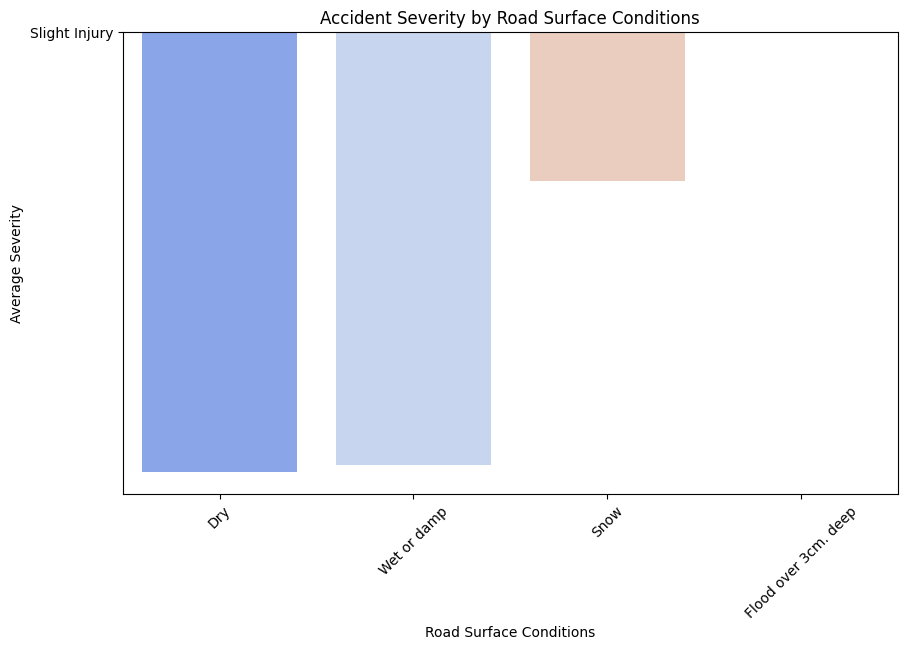

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='Road_surface_conditions', y='Accident_severity', ci=None, palette='coolwarm')
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.show()

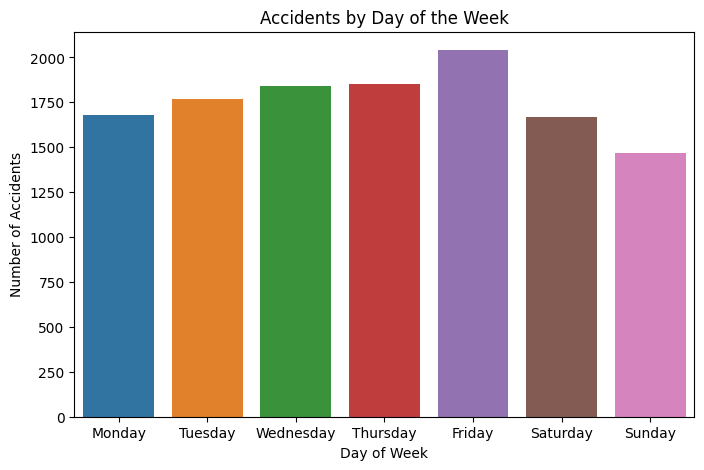

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='Day_of_week', palette='tab10', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

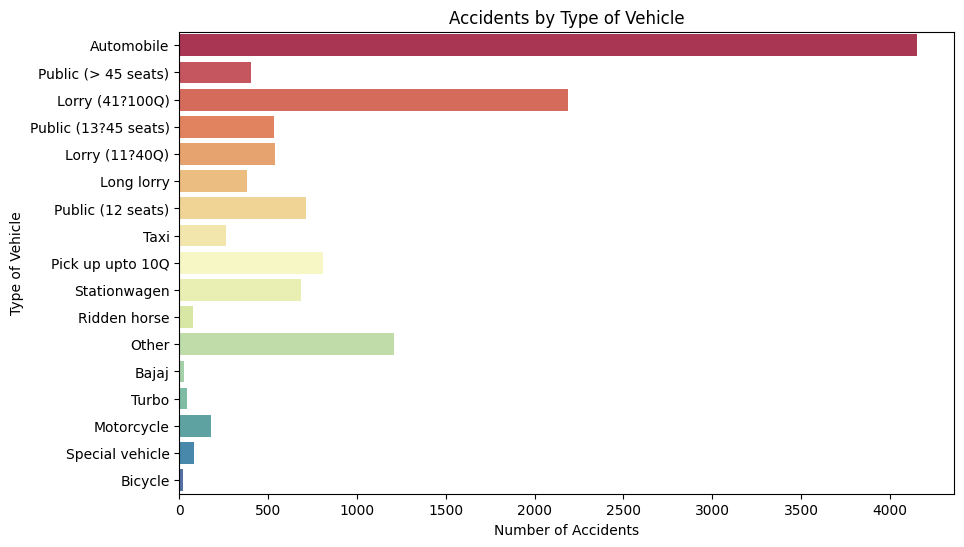

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, y='Type_of_vehicle', palette='Spectral')
plt.title('Accidents by Type of Vehicle')
plt.xlabel('Number of Accidents')
plt.ylabel('Type of Vehicle')
plt.show()

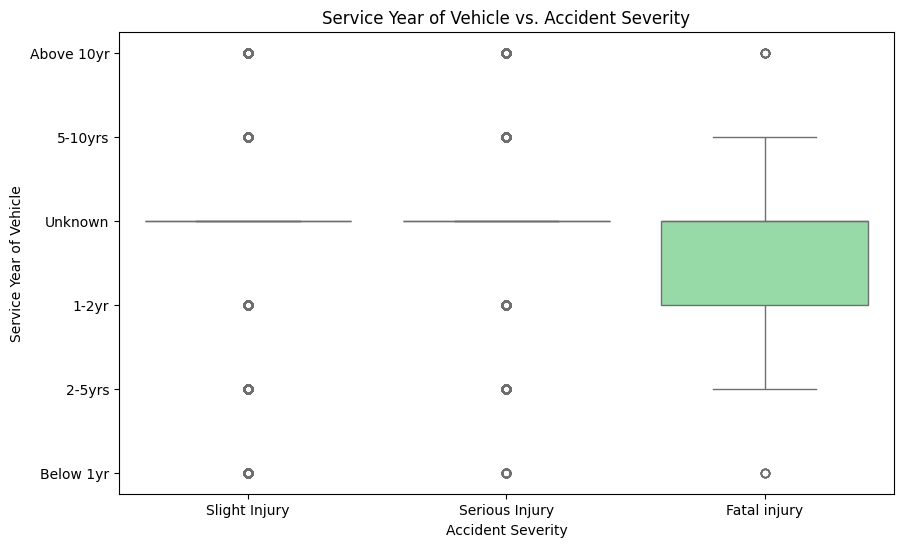

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Accident_severity', y='Service_year_of_vehicle', palette='pastel')
plt.title('Service Year of Vehicle vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Service Year of Vehicle')
plt.show()

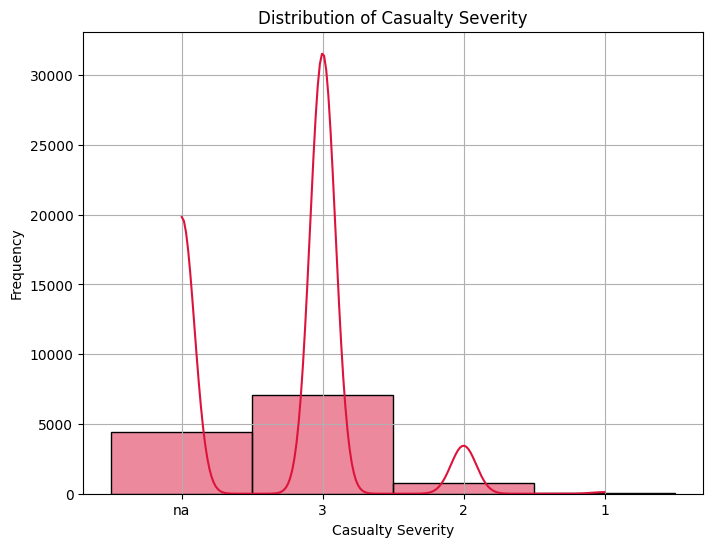

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Casualty_severity', kde=True, color='crimson', bins=15)
plt.title('Distribution of Casualty Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

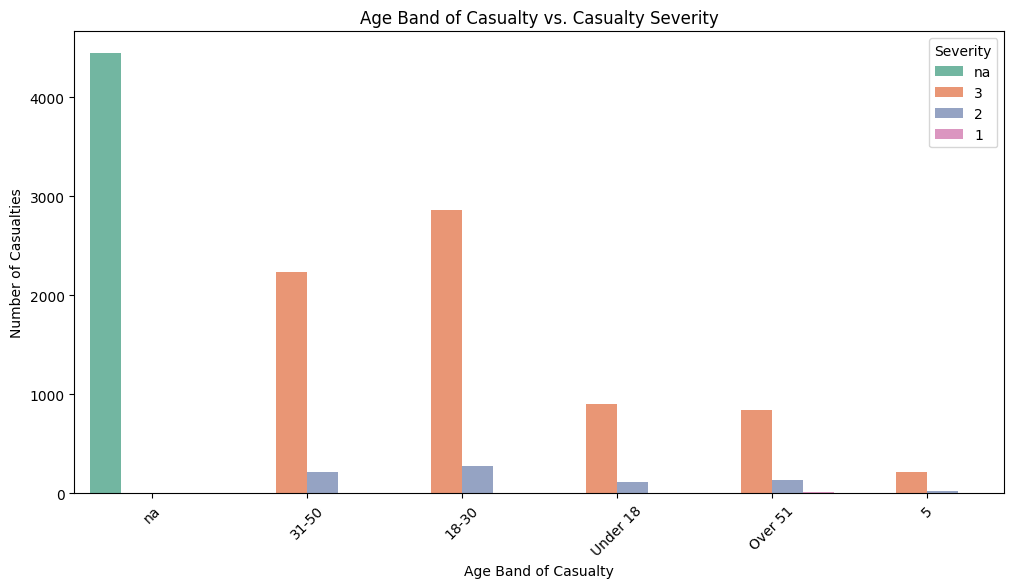

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Age_band_of_casualty', hue='Casualty_severity', palette='Set2')
plt.title('Age Band of Casualty vs. Casualty Severity')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

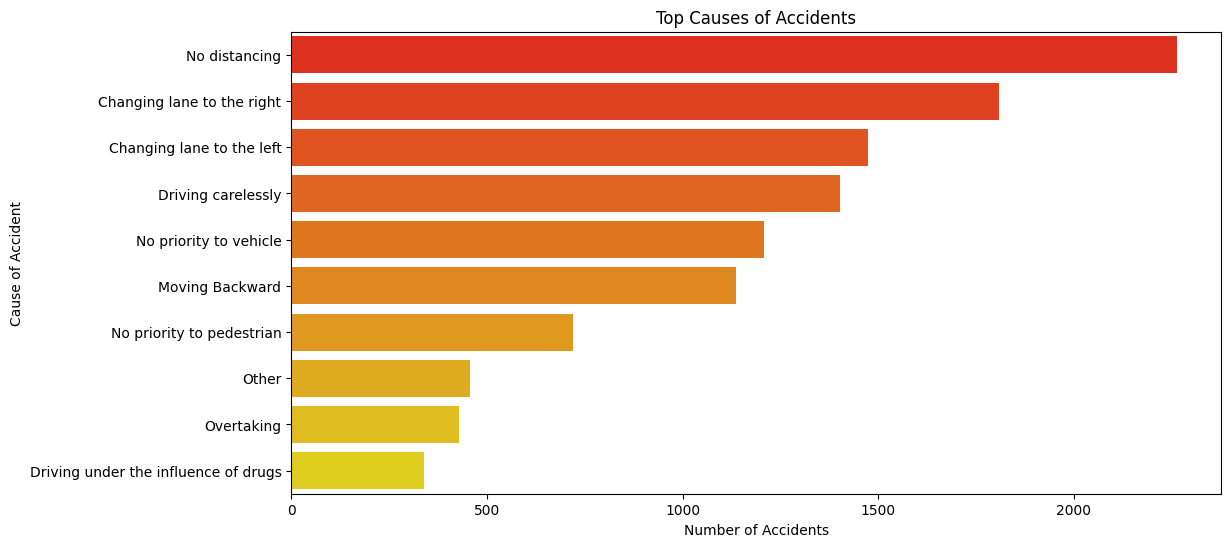

In [26]:
cause_data = dataset['Cause_of_accident'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=cause_data.values, y=cause_data.index, palette='autumn')
plt.title('Top Causes of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause of Accident')
plt.show()

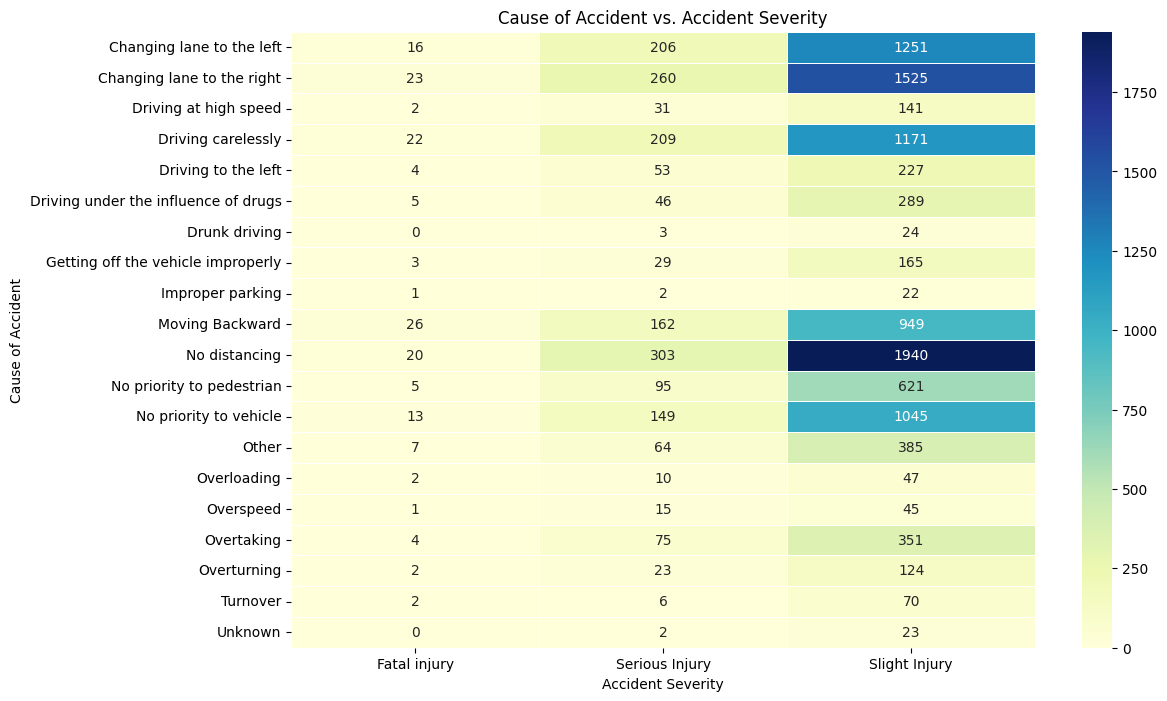

In [27]:
cause_severity = dataset.pivot_table(index='Cause_of_accident', columns='Accident_severity', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(cause_severity, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Cause of Accident vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Cause of Accident')
plt.show()

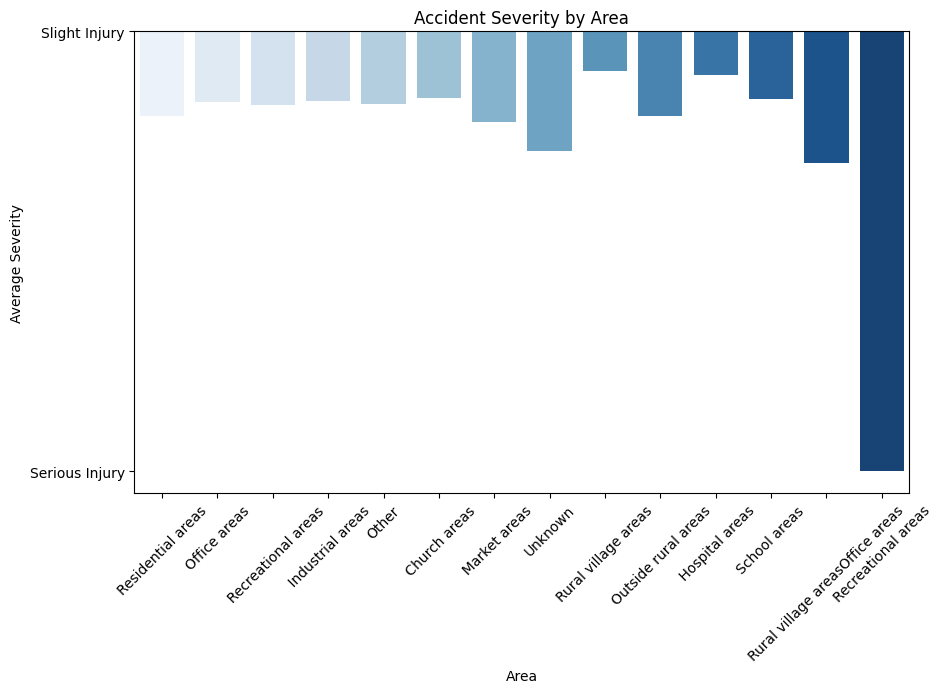

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dataset, x='Area_accident_occured', y='Accident_severity', ci=None, palette='Blues')
plt.title('Accident Severity by Area')
plt.xlabel('Area')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.show()

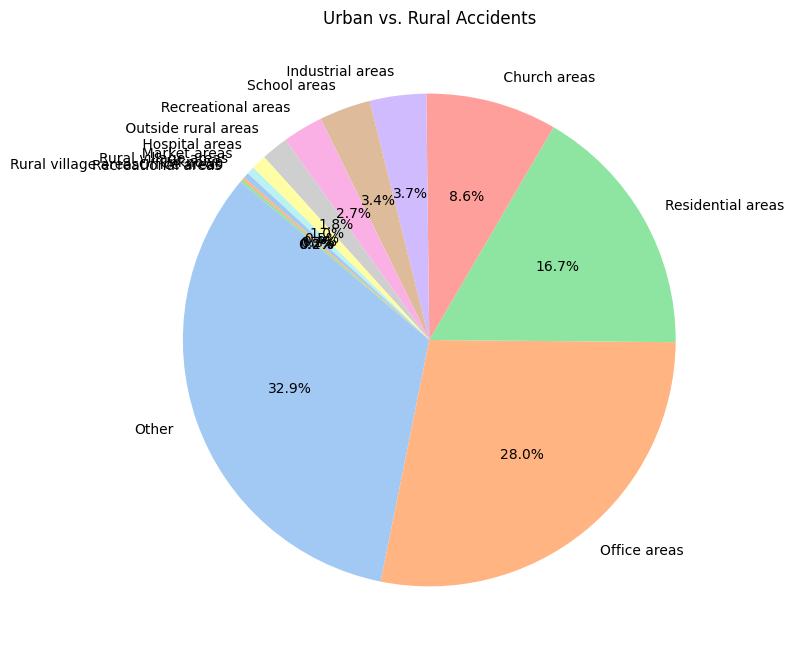

In [55]:
# Explode key slices
explode = [0.1 if area == 'Urban' else 0 for area in area_counts.index]

plt.figure(figsize=(8, 8))
area_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode, colors=sns.color_palette('pastel'))
plt.title('Urban vs. Rural Accidents')
plt.ylabel('')
plt.show()
